In [7]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install scikit_learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [12]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [13]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [14]:
import pandas as pd
data=pd.read_csv('K8 Reviews v0.2.csv')
print(data.head())
print()
print(data.shape)
print()
print(data.columns)
print()
print(data.info())

   sentiment                                             review
0          1             Good but need updates and improvements
1          0  Worst mobile i have bought ever, Battery is dr...
2          1  when I will get my 10% cash back.... its alrea...
3          1                                               Good
4          0  The worst phone everThey have changed the last...

(14675, 2)

Index(['sentiment', 'review'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14675 entries, 0 to 14674
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  14675 non-null  int64 
 1   review     14675 non-null  object
dtypes: int64(1), object(1)
memory usage: 229.4+ KB
None


In [15]:
data['clean_review'] = data['review'].apply(lambda x: str(x).lower())
print (data.head(20))

    sentiment                                             review  \
0           1             Good but need updates and improvements   
1           0  Worst mobile i have bought ever, Battery is dr...   
2           1  when I will get my 10% cash back.... its alrea...   
3           1                                               Good   
4           0  The worst phone everThey have changed the last...   
5           0  Only I'm telling don't buyI'm totally disappoi...   
6           1  Phone is awesome. But while charging, it heats...   
7           0                    The battery level has worn down   
8           0  It's over hitting problems...and phone hanging...   
9           0  A lot of glitches dont buy this thing better g...   
10          0                                              Wrost   
11          1  Good phone but charger not working / damage wi...   
12          0  Don't purchase this item, It is so much of hea...   
13          0  I have faced the battery problem 

In [16]:
data['clean_review'] = data['clean_review'].astype(str).apply(nltk.word_tokenize)
data.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,"[good, but, need, updates, and, improvements]"
1,0,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, i, have, bought, ever, ,, batt..."
2,1,when I will get my 10% cash back.... its alrea...,"[when, i, will, get, my, 10, %, cash, back, ....."
3,1,Good,[good]
4,0,The worst phone everThey have changed the last...,"[the, worst, phone, everthey, have, changed, t..."


In [17]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [18]:
data['clean_review'] = data['clean_review'].replace(r'[^a-zA-Z\s]', ' ',regex=True)
data.head()
data['clean_review'] = data['clean_review'].replace(r'\s{2,}', ' ',regex=True)
data.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,"[good, but, need, updates, and, improvements]"
1,0,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, i, have, bought, ever, ,, batt..."
2,1,when I will get my 10% cash back.... its alrea...,"[when, i, will, get, my, 10, %, cash, back, ....."
3,1,Good,[good]
4,0,The worst phone everThey have changed the last...,"[the, worst, phone, everthey, have, changed, t..."


In [19]:
data['filtered_words'] = data['clean_review'].astype(str).apply(lambda x: [word for word in x.split() if word.lower() not in stopwords.words('english')])

In [20]:
data['clean_review'] = data['clean_review'].apply(lambda x:[word for word in x if word not in stopwords.words("english") and len(word) > 3 and word.isalpha()])
data.head()
data = data[data['clean_review'].map(lambda x: len(x)) > 1].reset_index(drop=True)

In [21]:
pip install gensim


Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install -U gensim

Note: you may need to restart the kernel to use updated packages.


In [23]:
import gensim


In [24]:
from gensim import corpora

In [25]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
data['clean_review'] = data['clean_review'].apply(lambda x: [WordNetLemmatizer().lemmatize(word) for word in x])
data.head()

,sentiment,review,clean_review,filtered_words
0,1,Good but need updates and improvements,"[good, need, update, improvement]","[['good',, 'but',, 'need',, 'updates',, 'and',..."
1,0,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, bought, ever, battery, drainin...","[['worst',, 'mobile',, 'i',, 'have',, 'bought'..."
2,1,when I will get my 10% cash back.... its alrea...,"[cash, back, already, january]","[['when',, 'i',, 'will',, 'get',, 'my',, '10',..."
3,0,The worst phone everThey have changed the last...,"[worst, phone, everthey, changed, last, phone,...","[['the',, 'worst',, 'phone',, 'everthey',, 'ha..."
4,0,Only I'm telling don't buyI'm totally disappoi...,"[telling, buyi, totally, disappointedpoor, bat...","[['only',, 'i',, ""'m"",, 'telling',, 'do',, ""n'..."


In [27]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [28]:
data['clean_review'] = data['clean_review'].apply(lambda x: [word for word in x if nltk.pos_tag([word])[0][1] == 'NN'])

In [29]:
data = data[data['clean_review'].map(lambda x: len(x)) > 1].reset_index(drop=True)

In [30]:
dictionary = corpora.Dictionary(data['clean_review'])
print(dictionary)

Dictionary<6502 unique tokens: ['improvement', 'need', 'update', 'amazon', 'backup']...>


In [31]:
doc_term_matrix = data['clean_review'].apply(lambda x: dictionary.doc2bow(x))
doc_term_matrix[:10]

0                             [(0, 1), (1, 1), (2, 1)]
1    [(3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1...
2                                   [(18, 1), (19, 1)]
3                  [(3, 2), (20, 1), (21, 3), (22, 1)]
4        [(23, 1), (24, 1), (25, 1), (26, 1), (27, 1)]
5    [(14, 1), (21, 1), (28, 1), (29, 1), (30, 1), ...
6                           [(5, 1), (35, 1), (36, 1)]
7    [(14, 2), (21, 2), (22, 2), (33, 1), (37, 1), ...
8                 [(43, 1), (44, 1), (45, 1), (46, 1)]
9                  [(8, 1), (21, 1), (47, 1), (48, 1)]
Name: clean_review, dtype: object

In [32]:
from IPython.display import clear_output
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(corpus=doc_term_matrix, num_topics=12, id2word=dictionary, passes=10,random_state=45)
clear_output()

In [35]:
pip install pyLDAvis

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------- ----------------------- 1.0/2.6 MB 5.6 MB/s eta 0:00:01
   ------------------------------------ --- 2.4/2.6 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel,doc_term_matrix,dictionary)

In [37]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.257707 -0.064934       1        1  13.674065
3     -0.035910 -0.076006       2        1  10.781468
8     -0.120170 -0.118478       3        1  10.493585
4     -0.100010 -0.158602       4        1  10.401546
7      0.219989 -0.084870       5        1   9.649859
6     -0.165714 -0.091482       6        1   9.483034
11    -0.152866  0.043800       7        1   7.492315
10    -0.028576  0.076369       8        1   6.857533
0      0.251077 -0.013989       9        1   6.416387
5     -0.109915 -0.012010      10        1   5.924815
2     -0.022564  0.169093      11        1   4.639016
9      0.006950  0.331109      12        1   4.186377, topic_info=          Term         Freq        Total Category  logprob  loglift
15      mobile  2273.000000  2273.000000  Default  30.0000  30.0000
76      camera  3186.000000  3186.000000  Default  29.0000  29.0000
5      battery  3091.000000  3091.000000  Default  28.0000  28.0000
22     problem  1516.000000  1516.000000  Default  27.0000  27.0000
14      lenovo  2011.000000  2011.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
115    feature    45.466803   841.450470  Topic12  -4.4552   0.2552
21       phone    94.280198  6582.000537  Topic12  -3.7259  -1.0725
257     switch    18.545588   112.619897  Topic12  -5.3520   1.3695
272  operating    10.448843    30.236346  Topic12  -5.9257   2.1108
647      cover    10.360772    73.479151  Topic12  -5.9342   1.2144

[682 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
3061     11  0.963727           abhi
1444      2  0.959568         access
376       1  0.979951      accessory
1434      8  0.952130       accurate
1140      9  0.929814  advertisement
...     ...       ...            ...
108       6  0.157964         worthy
261      11  0.963557          wrost
42        3  0.763295           year
42        7  0.216267           year
417       8  0.950484           zoom

[1027 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 9, 5, 8, 7, 12, 11, 1, 6, 3, 10])

In [38]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=ldamodel,texts=data['clean_review'],dictionary=dictionary , coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())


Coherence Score:  0.5540045602913822


In [40]:
def calculate_topic_cv(ldamodel,texts,dictionary,topic_range):
  cv_score =[]
  topic_num = []
  for i in range(2,topic_range):
    topic_num.append(i)
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=i, id2word=dictionary, passes=10,random_state=45)
    cv_score.append(CoherenceModel(model=ldamodel,texts=texts,dictionary=dictionary , coherence='c_v').get_coherence())
    clear_output()
  return topic_num,cv_score

In [41]:
topic_num,cv_score = calculate_topic_cv(ldamodel,data['clean_review'],dictionary,15)

In [42]:
pd.DataFrame(zip(topic_num,cv_score),columns=['Topic','Coherence_Score']).set_index('Topic').sort_values('Coherence_Score',ascending=False)

,Coherence_Score
Topic,
2,0.628726
4,0.618667
5,0.597831
8,0.590481
10,0.556205
9,0.554747
13,0.554712
12,0.554005
7,0.553138


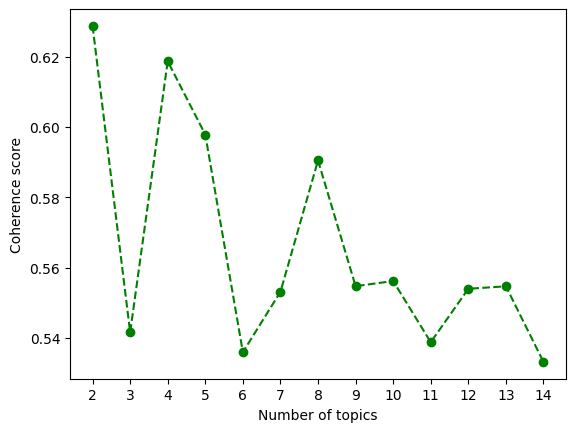

In [43]:
import matplotlib.pyplot as plt

plt.plot(topic_num,cv_score,color='green', marker='o', linestyle='dashed')
plt.xticks(range(2,15))
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.show()

In [44]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=6, id2word=dictionary, passes=10,random_state=45)
clear_output()
print(CoherenceModel(model=ldamodel,texts=data['clean_review'],dictionary=dictionary , coherence='c_v').get_coherence())

0.5359877268277332


In [45]:
ldamodel.print_topics()

[(0,
  '0.101*"phone" + 0.097*"mobile" + 0.058*"price" + 0.053*"product" + 0.044*"camera" + 0.041*"money" + 0.041*"awesome" + 0.033*"performance" + 0.032*"excellent" + 0.027*"feature"'),
 (1,
  '0.108*"camera" + 0.065*"phone" + 0.044*"quality" + 0.030*"battery" + 0.019*"sound" + 0.014*"feature" + 0.014*"front" + 0.013*"processor" + 0.012*"mode" + 0.012*"look"'),
 (2,
  '0.039*"delivery" + 0.034*"phone" + 0.026*"volta" + 0.024*"support" + 0.016*"amazon" + 0.014*"purchase" + 0.012*"handset" + 0.011*"fast" + 0.010*"cell" + 0.009*"headphone"'),
 (3,
  '0.064*"mobile" + 0.050*"network" + 0.039*"phone" + 0.038*"problem" + 0.037*"update" + 0.024*"heat" + 0.020*"glass" + 0.019*"screen" + 0.017*"time" + 0.017*"signal"'),
 (4,
  '0.075*"lenovo" + 0.065*"phone" + 0.046*"note" + 0.042*"product" + 0.033*"amazon" + 0.022*"service" + 0.017*"return" + 0.017*"mobile" + 0.015*"screen" + 0.014*"please"'),
 (5,
  '0.109*"battery" + 0.074*"phone" + 0.061*"heating" + 0.049*"problem" + 0.048*"issue" + 0.026*

In [46]:
pyLDAvis.gensim.prepare(ldamodel,doc_term_matrix,dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.190887  0.051298       1        1  26.015870
4     -0.073295 -0.006836       2        1  23.588556
5     -0.047977  0.220282       3        1  21.101216
0      0.239997 -0.119030       4        1  11.662875
3     -0.134209  0.079710       5        1  10.963099
2     -0.175403 -0.225424       6        1   6.668384, topic_info=        Term         Freq        Total Category  logprob  loglift
76    camera  3094.000000  3094.000000  Default  30.0000  30.0000
15    mobile  2077.000000  2077.000000  Default  29.0000  29.0000
5    battery  2994.000000  2994.000000  Default  28.0000  28.0000
14    lenovo  1869.000000  1869.000000  Default  27.0000  27.0000
49   heating  1215.000000  1215.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
424   future    25.373266    60.653294   Topic6  -5.5040   1.8363
649   review    28.810629   189.938514   Topic6  -5.3770   0.8218
45    option    28.672517   352.322701   Topic6  -5.3818   0.1992
89     issue    30.387272  1373.300990   Topic6  -5.3237  -1.1032
577    video    25.475348   258.300015   Topic6  -5.5000   0.3914

[364 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
787       5  0.983817     accept
376       2  0.979767  accessory
1696      6  0.940699      alarm
3         2  0.877165     amazon
3         6  0.122755     amazon
...     ...       ...        ...
112       4  0.784782      worth
112       6  0.186341      worth
261       2  0.975305      wrost
1113      2  0.957636  yesterday
427       5  0.942462       zero

[518 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 6, 1, 4, 3])

In [47]:
topic_lookup_data = pd.DataFrame((ldamodel.print_topics()),columns=['Topic_Number','Top_Keywords'])
topic_lookup_data['Topic_Name'] = ['Camera, Sound','Mixed issues','Heating issue','turbo charger','Connectivity','Battery']
topic_lookup_data = topic_lookup_data[['Topic_Number','Topic_Name','Top_Keywords']]
topic_lookup_data['Top_Keywords'] = topic_lookup_data.Top_Keywords.str.replace(r'[^a-z]',' ',regex=True).apply(lambda x: x.split())
topic_lookup_data.style.set_properties(subset=['Top_Keywords'], **{'width': '300px'})

,Topic_Number,Topic_Name,Top_Keywords
0,0,"Camera, Sound","['phone', 'mobile', 'price', 'product', 'camera', 'money', 'awesome', 'performance', 'excellent', 'feature']"
1,1,Mixed issues,"['camera', 'phone', 'quality', 'battery', 'sound', 'feature', 'front', 'processor', 'mode', 'look']"
2,2,Heating issue,"['delivery', 'phone', 'volta', 'support', 'amazon', 'purchase', 'handset', 'fast', 'cell', 'headphone']"
3,3,turbo charger,"['mobile', 'network', 'phone', 'problem', 'update', 'heat', 'glass', 'screen', 'time', 'signal']"
4,4,Connectivity,"['lenovo', 'phone', 'note', 'product', 'amazon', 'service', 'return', 'mobile', 'screen', 'please']"
5,5,Battery,"['battery', 'phone', 'heating', 'problem', 'issue', 'charge', 'fast', 'hour', 'drain', 'charger']"


In [48]:
for index,sent in enumerate(ldamodel[doc_term_matrix]):
  topic_num =[]
  topic_details = sorted(sent,key=lambda x: x[1], reverse=True)[:2]
  topic_num.append(topic_details[0][0])
  if len(topic_details) > 1:
    if topic_details[1][1] > 0.35:
      topic_num.append(topic_details[1][0])
  data.loc[index,'Topic_Number'] = ','.join(str(x) for x in sorted(topic_num))

In [49]:
for index,topic_num in enumerate(data.Topic_Number):
  topic_name_list=[]
  for single_topic_num in topic_num.split(','):
    single_topic_num=int(single_topic_num)
    topic_name_list.append(topic_lookup_data.loc\
                           [topic_lookup_data.Topic_Number == single_topic_num,'Topic_Name'][single_topic_num])
  data.loc[index,'Topic_Name'] =' & '.join(topic_name_list)

In [51]:
data.head()

,sentiment,review,clean_review,filtered_words,Topic_Number,Topic_Name
0,1,Good but need updates and improvements,"[need, update, improvement]","[['good',, 'but',, 'need',, 'updates',, 'and',...","1,3",Mixed issues & turbo charger
1,0,"Worst mobile i have bought ever, Battery is dr...","[mobile, bought, battery, hell, backup, hour, ...","[['worst',, 'mobile',, 'i',, 'have',, 'bought'...","3,5",turbo charger & Battery
2,1,when I will get my 10% cash back.... its alrea...,"[cash, january]","[['when',, 'i',, 'will',, 'get',, 'my',, '10',...",5,Battery
3,0,The worst phone everThey have changed the last...,"[phone, everthey, phone, problem, amazon, phon...","[['the',, 'worst',, 'phone',, 'everthey',, 'ha...",4,Connectivity
4,0,Only I'm telling don't buyI'm totally disappoi...,"[buyi, disappointedpoor, batterypoor, camerawa...","[['only',, 'i',, ""'m"",, 'telling',, 'do',, ""n'...",1,Mixed issues


In [53]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


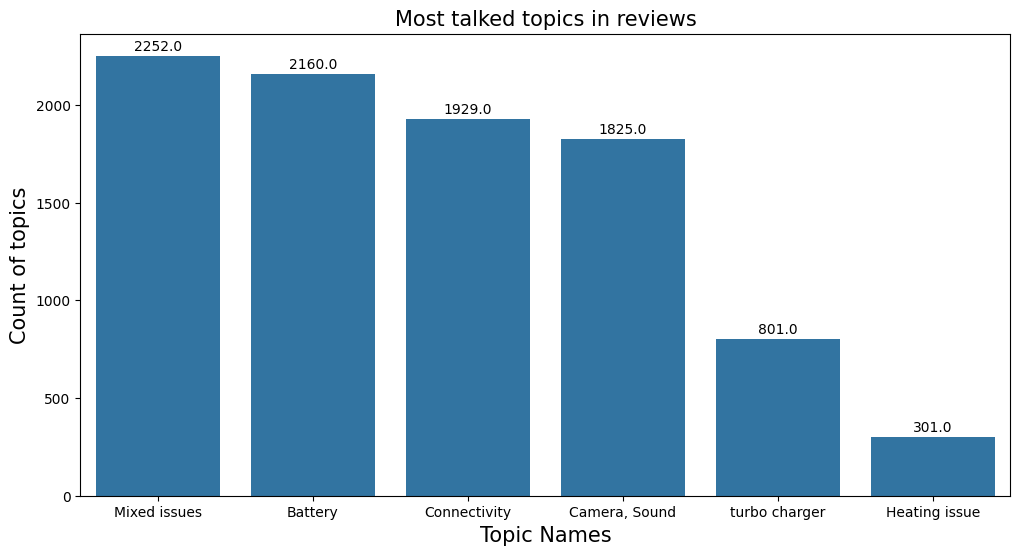

In [54]:
import seaborn as sns
plt.figure(figsize=(12,6))
ax = sns.barplot(x=data.Topic_Name.value_counts()[:6].index,y=data.Topic_Name.value_counts()[:6].values)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+50),ha = 'center', va = 'center')
plt.xlabel('Topic Names',size=15)
plt.ylabel('Count of topics',size=15)
plt.title('Most talked topics in reviews',size=15)
plt.show()

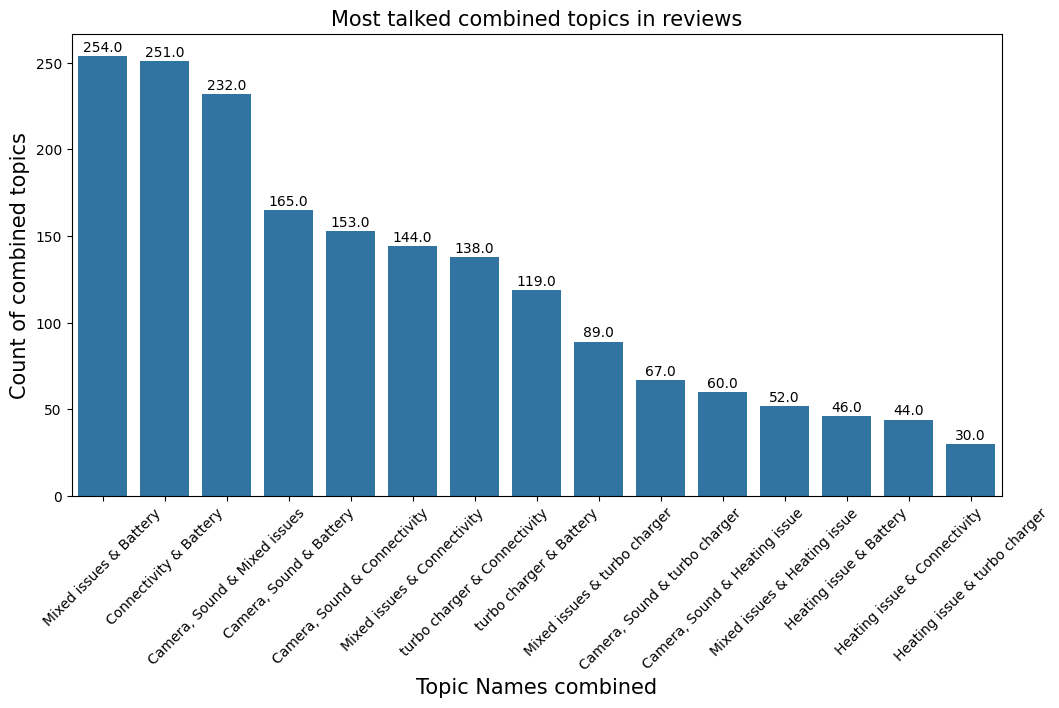

In [55]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=data.Topic_Name.value_counts()[6:].index,y=data.Topic_Name.value_counts()[6:].values)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+5),ha = 'center', va = 'center')
plt.xlabel('Topic Names combined',size=15)
plt.ylabel('Count of combined topics',size=15)
plt.title('Most talked combined topics in reviews',size=15)
plt.xticks(rotation=45)
plt.show()

In [56]:
data.loc[data.Topic_Number.str.contains('5'),['review','Topic_Name']].head(10).style.set_properties(subset=['review'], **{'width': '300px'})

,review,Topic_Name
1,"Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don't know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me.",turbo charger & Battery
2,when I will get my 10% cash back.... its already 15 January..,Battery
9,Good phone but charger not working / damage within 2 months.,Connectivity & Battery
10,"Don't purchase this item, It is so much of heating &Battery life is very poor",Battery
11,I have faced the battery problem and motherboard problem with in 8 months. This is the worst mobile in my life.,Battery
15,Battery draining very rapidly I don't know why..Tell me possible solutions for battery life,Battery
24,"Before the new update of 8.0 Oreo, it worked superbly, the battery back-up is also superb and there is not that much heating problem...But... After that update, my phone got heating up simply, battery is also draining unnecessarily... really very much disappointed after that update of 8.0 Oreo...😒😒☹️",turbo charger & Battery
26,Good performance but the battery gets oveheated,Battery
32,Not Worth it's big disappointment from lenovo signal problems big headache problems with incoming calls and always show that you are not in range.,Battery
36,After using only 3-4 mins continuously it get heated.Camera quality is also not good.,Mixed issues & Battery


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Exception ignored in: <function Image.__del__ at 0x0000024B90C2BAF0>
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\tkinter\__init__.py", line 4017, in __del__
    self.tk.call('image', 'delete', self.name)
RuntimeError: main thread is not in main loop


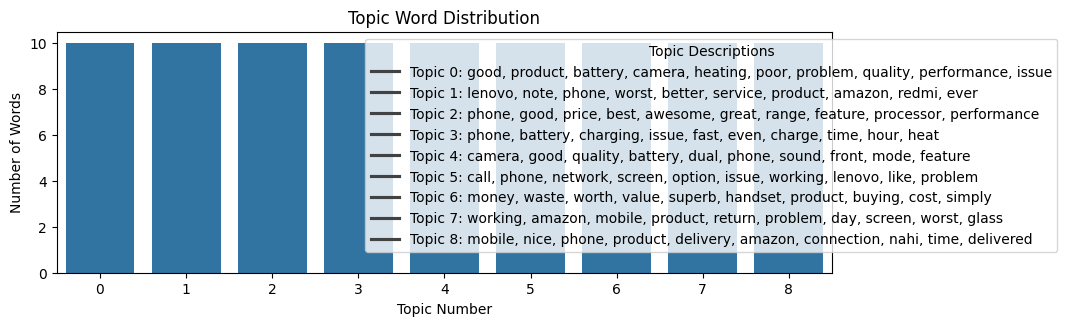

In [62]:
import tkinter as tk
from tkinter import filedialog, messagebox
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pandas as pd
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import nltk
import seaborn as sns
import threading

# Download required NLTK packages
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

class LDATopicModelingApp:
    def __init__(self, root):
        self.root = root
        self.root.title("📊 LDA Topic Modeling App")
        self.root.geometry("1000x700")

        # Attributes
        self.data = None
        self.dictionary = None
        self.doc_term_matrix = None
        self.ldamodel = None
        self.topic_names = {}

        # Create widgets
        self.create_widgets()

    def create_widgets(self):
        # Title Label
        title_label = tk.Label(self.root, text="📊 LDA Topic Modeling App", font=("Arial", 20, "bold"))
        title_label.pack(pady=10)

        # Buttons for steps
        button_frame = tk.Frame(self.root)
        button_frame.pack(pady=10)

        upload_button = tk.Button(button_frame, text="Upload Dataset", command=self.upload_data, width=20)
        upload_button.grid(row=0, column=0, padx=10)

        process_button = tk.Button(button_frame, text="Process Data", command=self.process_data, width=20)
        process_button.grid(row=0, column=1, padx=10)

        visualize_button = tk.Button(button_frame, text="Visualize Topics", command=self.visualize_topics, width=20)
        visualize_button.grid(row=0, column=2, padx=10)

        coherence_button = tk.Button(button_frame, text="Calculate Coherence", command=self.calculate_coherence, width=20)
        coherence_button.grid(row=0, column=3, padx=10)

        # Topic slider
        self.topic_slider = tk.Scale(self.root, from_=2, to=15, orient="horizontal", label="Number of Topics")
        self.topic_slider.pack(pady=10)

        # Output area
        self.output_text = tk.Text(self.root, height=10, width=100)
        self.output_text.pack(pady=10)

        # Placeholder for graph
        self.graph_frame = tk.Frame(self.root)
        self.graph_frame.pack(pady=10, fill="both", expand=True)

    def upload_data(self):
        file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
        if file_path:
            self.data = pd.read_csv(file_path)
            self.output_text.insert(tk.END, f"📂 Data uploaded successfully with shape: {self.data.shape}\n")

    def process_data(self):
        if self.data is not None:
            # Start a thread for processing the data
            thread = threading.Thread(target=self._process_data_task)
            thread.start()
        else:
            messagebox.showerror("Error", "Please upload a dataset first.")

    def _process_data_task(self):
        """Background task to process data."""
        self.output_text.insert(tk.END, "📂 Processing data... This may take a while.\n")
        try:
            self.data['clean_review'] = self.data['review'].astype(str).apply(lambda x: x.lower())
            self.data['clean_review'] = self.data['clean_review'].replace(r'[^a-zA-Z\s]', ' ', regex=True)
            self.data['clean_review'] = self.data['clean_review'].replace(r'\s{2,}', ' ', regex=True)
            self.data['clean_review'] = self.data['clean_review'].apply(nltk.word_tokenize)
            self.data['clean_review'] = self.data['clean_review'].apply(
                lambda x: [word for word in x if word not in stopwords.words("english") and len(word) > 3 and word.isalpha()]
            )
            self.data['clean_review'] = self.data['clean_review'].apply(
                lambda x: [WordNetLemmatizer().lemmatize(word) for word in x]
            )
            self.data = self.data[self.data['clean_review'].map(lambda x: len(x)) > 1].reset_index(drop=True)

            self.dictionary = corpora.Dictionary(self.data['clean_review'])
            self.doc_term_matrix = self.data['clean_review'].apply(lambda x: self.dictionary.doc2bow(x))

            self.output_text.insert(tk.END, "✔ Data processing complete!\n")
        except Exception as e:
            self.output_text.insert(tk.END, f"❌ Error during processing: {str(e)}\n")

    def calculate_coherence(self):
        if self.doc_term_matrix is not None:
            num_topics = self.topic_slider.get()
            self.output_text.insert(tk.END, f"📈 Calculating coherence score for {num_topics} topics...\n")

            self.ldamodel = gensim.models.ldamodel.LdaModel(
                corpus=self.doc_term_matrix,
                num_topics=num_topics,
                id2word=self.dictionary,
                passes=10,
                random_state=45
            )

            coherence_model_lda = CoherenceModel(
                model=self.ldamodel,
                texts=self.data['clean_review'],
                dictionary=self.dictionary,
                coherence='c_v'
            )
            coherence_score = coherence_model_lda.get_coherence()

            self.output_text.insert(tk.END, f"✔ Coherence Score: {coherence_score:.2f}\n")

            # Assign topic names for visualization
            self.topic_names = {
                i: f"Topic {i + 1}: " + ", ".join([word for word, _ in self.ldamodel.show_topic(i)])
                for i in range(num_topics)
            }
        else:
            messagebox.showerror("Error", "Please process the data first.")

    def visualize_topics(self):
        if self.ldamodel is not None:
            self.output_text.insert(tk.END, "🔍 Visualizing topics...\n")

            # Prepare data for visualization
            topic_data = pd.DataFrame(
                self.ldamodel.show_topics(formatted=False),
                columns=['Topic_Number', 'Words']
            )
            topic_word_counts = topic_data['Words'].apply(len)

            plt.figure(figsize=(10, 6))
            sns.barplot(
                x=topic_data['Topic_Number'],
                y=topic_word_counts
            )
            plt.title("Topic Word Distribution")
            plt.xlabel("Topic Number")
            plt.ylabel("Number of Words")

            # Add a legend to map topic numbers to topic names
            legend_labels = [
                f"Topic {i}: " + ", ".join([word for word, _ in self.ldamodel.show_topic(i)])
                for i in topic_data['Topic_Number']
            ]
            plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.3, 1.0), title="Topic Descriptions")

            # Clear previous graph
            for widget in self.graph_frame.winfo_children():
                widget.destroy()

            # Embed the graph
            canvas = FigureCanvasTkAgg(plt.gcf(), master=self.graph_frame)
            canvas.draw()
            canvas.get_tk_widget().pack()
        else:
            messagebox.showerror("Error", "Please calculate coherence or process the data first.")


# Initialize Tkinter app
root = tk.Tk()
app = LDATopicModelingApp(root)
root.mainloop()